In [1]:
import os
import sys
from pathlib import Path
simFolder = str(Path(os.path.abspath('')).parent / "sim")
sys.path.append(simFolder)

In [2]:
from tms_thresholds.threshold_sim import TMS_sim

In [3]:
# Monophasic
tms_pulse_width_ms=0.075                      #

pre_tms_period = 0 # For cell to reach baseline/get data on baseline activity
spike_detection_time = 1.5
tms_spiking_period = tms_pulse_width_ms+spike_detection_time # For spike detection
post_tms_period = 0 # For more baseline recording if necessary

cell_name = 'L5_TTPC2_cADpyr'
# L23_PC_cADpyr, L5_TTPC2_cADpyr, L23_SBC_bNAC, L5_LBC_cNAC
# TODO: Look at Jones 2007 paper to find cell types?
morphIDs = [1]
angular_resolution = 10

duration = pre_tms_period + tms_spiking_period + post_tms_period # ms

starting_E = 500
search_factor = 2 # Should essentially be a reflection of confidence that starting_E is a good guess: factor should be lower if guess is good
search_precision = 0.01 # Threshold estimation will be at most this amount of relative error above the true threshold (e.g. 0.01 = 1% error)

num_cores = 8

tms_params = dict(
    # Coupling params
    decay_rate_percent_per_mm=0,            #
    E_field_dir={'Coord_type': 'Spherical',
                'Polar': 90,
                'Azimuthal': 240,},
    decay_dir={'Coord_type': 'Spherical',
                'Polar': 180,
                'Azimuthal': 0,},
    somatodendritic_axis=[0, 1, 0],
    # Waveform params
    efield_amplitude_V_per_m=starting_E,
    stim_type='sTMS',
    stim_start_ms=pre_tms_period,
    num_pulses_per_burst=1,
    tms_pulse_width_ms=tms_pulse_width_ms,  #
    tms_pulse_shape='Half-Sine',           #
    # Simulation params
    tms_spiking_period=tms_spiking_period,
    simulation_duration_ms=duration,
    default_dt = 0.025,
    num_time_steps_in_pulse_width = 50,
    # Plotting quasipotentials
    plot=False,
)

syn_params = None

cell_name_ID = f'{cell_name}_{morphIDs[0]}'

In [4]:
ecs = TMS_sim(cell_name_ID, tms_params, syn_params)

hi_res_width_ms: 0.175
pulse_duration_ms: 0.7374
Applying extracellular stim (sTMS) to cell...

Running with interval func using NEURON for 1.575 ms...
Switching to default dt at t= 0.175
  Done; run time = 0.16 s; real-time ratio: 0.01.

Gathering data...
  Done; gather time = 0.17 s.

Analyzing...
  Cells: 1
  Connections: 0 (0.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 0.0 s; 1 workers
  Run time: 0.16 s


[[]]
Plotting recorded cell traces ... cell


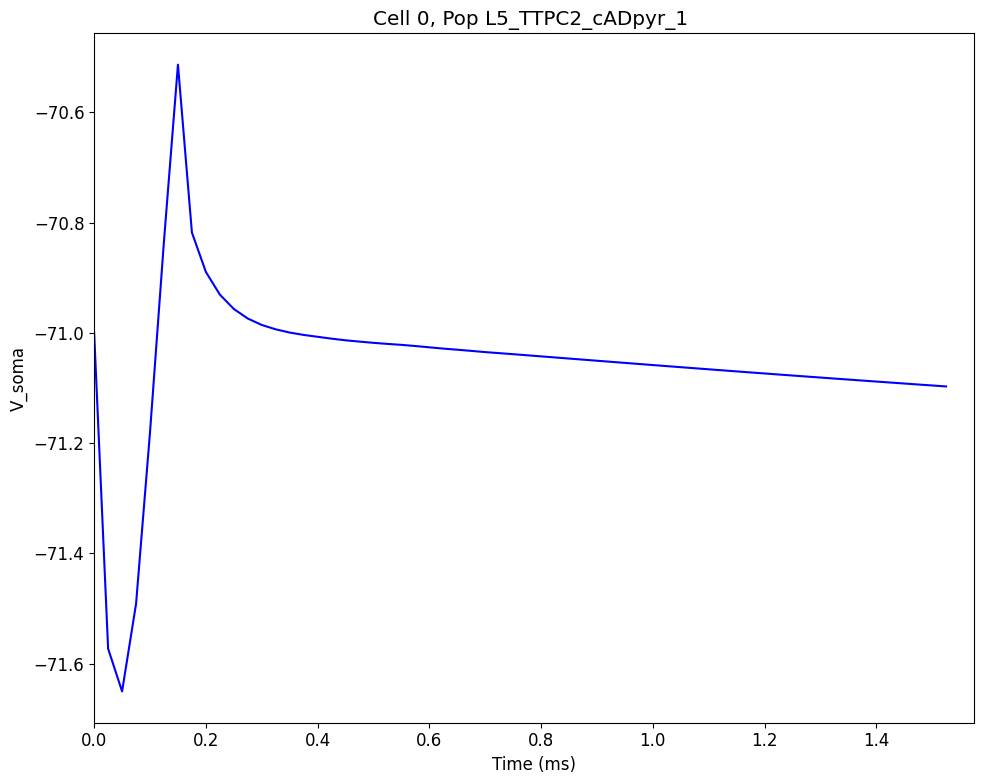

({'_gid_0': <Figure size 1000x800 with 1 Axes>},
 {'tracesData': [{'t': array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
           0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
           0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
           0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
           0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  ,
           1.125, 1.15 , 1.175, 1.2  , 1.225, 1.25 , 1.275, 1.3  , 1.325,
           1.35 , 1.375, 1.4  , 1.425, 1.45 , 1.475, 1.5  , 1.525, 1.55 ,
           1.575]),
    'cell_0_V_soma': array([-71.        , -71.57281145, -71.65031201, -71.49167561,
           -71.18013343, -70.83318805, -70.51337679, -70.8179293 ,
           -70.88938077, -70.93048863, -70.9565441 , -70.97391721,
           -70.98555772, -70.99350033, -70.9993656 , -71.00362801,
           -71.00706851, -71.0104126 , -71.01341628, -71.01576436,
           -71.01800756, -71.0199527 , -71

: 

In [ ]:
from netpyne import sim
from netpyne.analysis.tools import getSpktSpkid

# %matplotlib inline

spike_times_by_id = [getSpktSpkid(cellGids=[cell.gid])[1] for cell in sim.net.cells]
print(spike_times_by_id)

sim.analysis.plotTraces()